#  Airbnb 

IT is a hospitality company that runs an online marketplace for renting and leasing short-term lodging, primarily homestays, or tourism experiences. The company does not own any of the real estate listings, nor does it host events; it acts as a broker, receiving commissions from each booking. 


It is interested in developing a pricing service for its users that will compute a recommended price based on the features of a listing. You are approached by Airbnb to develop a model for predicting nightly prices of Airbnb listings based on state-of-art techniques from statistical machine learning.

### Problem Statement:

1) To predict the nightly prices for different accomodations.

2) To check factors that influences the price.

3) Does the grographical location plays an important role in deciding the price factor.

4) What is a difference of price between host and a super host


In [1]:
#### Problem statement is not much appealing. Try to modify it.

### Data Description:

Id- Serial no.

price- price per night

host_is_superhost: T-True the host is  super-host, f-False the host is not a super-host ( A superhost is a a mark of quality, requiring various conditions to be met)

host_total_listings_count:how many listings the host is responsible for in total.

host_identity_verified: t- True, the host identity is verified, f-False, identity not verified (e.g. by verifying government ID, a phone number and an email address)

latitude: geographical location of the place with respect to latitude.

longitude: geographical location of the place with respect to longitute.

property_type: type of property (e.g. apartment, room, boat, cabin, guesthouse, hostel etc.)

room_type: Type of room (e.g. sharing, private, entire house etc)

accommodates: total no. of people the property can accommodate.

bathrooms: no. of bathrooms.

bedrooms: no. of bedrooms

beds:no. of beds. 

security_deposit: security deposit amount.

cleaning_fee: fee charged for cleaning.

extra_people: extra people charges.

minimum_nights: duration of stay minimum nights. 

maximum_nights: duration of stay maximum nights.

number_of_reviews: total no. of reviews.

(review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication,review_scores_location, review_scores_value)-Review ratings for each category (accuracy, cleanliness, check-in, communication, location, value and overall total)

instant_bookable- t-True booking can be done instantly, f-False booking cannot be done instantly.

is_business_travel_ready: is it ready for stay related to business purpose.

cancellation_policy: cancellation policy of the host (eg. strict, moderate, flexible)

reviews_per_month: monthly review scores

### Target Variable: 

Price: This variable displayes the price per night of different host

## Importing and Data Inspection

####  import important libraries and reading the dataset

In [2]:
import pandas as pd     # data processing
import numpy as np      # linear algebra
import matplotlib.pyplot as plt  # data visualization
%matplotlib inline
import seaborn as sns           # seaborn is another library for visualization of data
colour=sns.color_palette()

In [3]:
air_df=pd.read_csv('D:\\datas\\airbnb_train.csv') # reading the data set

In [4]:
print(air_df.shape)  #checking the dataset dimensions

(1000, 30)


the dataset has 1000 observations with 30 variables

#### Data Inspection

In [5]:
pd.set_option('display.max_column',30) # to display all the columns of the dataset, we set max column limit
air_df.head()

,Id,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
0,0,150,f,22.0,t,-33.846469,151.205171,Apartment,Entire home/apt,2,1.0,1,1.0,500.0,330.0,0,7,1125,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict,0.53
1,1,66,f,1.0,t,-33.895736,151.173529,Apartment,Private room,2,1.5,1,1.0,NaN,NaN,0,21,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,NaN
2,2,325,t,1.0,t,-33.879322,151.222408,House,Entire home/apt,4,2.0,2,2.0,500.0,180.0,0,3,90,21,99.0,10.0,10.0,10.0,10.0,10.0,9.0,f,f,moderate,2.38
3,3,145,f,1.0,f,-33.856874,151.149600,House,Entire home/apt,6,1.5,3,4.0,0.0,80.0,0,4,1125,3,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,flexible,1.96
4,4,200,f,6.0,t,-33.907150,151.178552,House,Entire home/apt,4,1.0,2,2.0,350.0,85.0,50,2,30,22,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,moderate,2.73


In [6]:
air_df.info()  #to get a brief summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
Id                             1000 non-null int64
price                          1000 non-null int64
host_is_superhost              998 non-null object
host_total_listings_count      998 non-null float64
host_identity_verified         998 non-null object
latitude                       1000 non-null float64
longitude                      1000 non-null float64
property_type                  1000 non-null object
room_type                      1000 non-null object
accommodates                   1000 non-null int64
bathrooms                      997 non-null float64
bedrooms                       1000 non-null int64
beds                           998 non-null float64
security_deposit               574 non-null float64
cleaning_fee                   693 non-null float64
extra_people                   1000 non-null int64
minimum_nights                 1000 non-null int64
maximum_nights  

from the above information we notice the following:

1) the dataset has 15-float variables, 8-int variables and 7-object variables

2) the dataset is 234.5KB in size

3) We also notice a lot of missing value with some variables, we shall go for a deeper analysis for the same.

In [7]:
air_df.describe(include='all').T  ##statistical description of the continuous and categorical variables

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1000,NaN,NaN,NaN,499.5,288.819,0,249.75,499.5,749.25,999
price,1000,NaN,NaN,NaN,145.521,91.4285,18,75,120,195.75,449
host_is_superhost,998,2,f,905,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_total_listings_count,998,NaN,NaN,NaN,7.04409,27.2345,1,1,1,2,205
host_identity_verified,998,2,f,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,1000,NaN,NaN,NaN,-33.8668,0.068062,-34.0925,-33.8997,-33.885,-33.843,-33.4018
longitude,1000,NaN,NaN,NaN,151.206,0.0807778,150.651,151.183,151.217,151.261,151.339
property_type,1000,19,Apartment,651,NaN,NaN,NaN,NaN,NaN,NaN,NaN
room_type,1000,3,Entire home/apt,589,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,1000,NaN,NaN,NaN,2.988,1.68187,1,2,2,4,16


from the above statistical description we can see that:

1) host_total_listings_count, bathrooms, beds, security_deposit, cleaning_fee and reviews on different category have missing values.

2) variables like host_total_listing_counts, security_deposit, extra_people, maximum_nights and number_of_reviews seems to have outliers.

we need detailed investigation into outliers and missing values situations in order to take the necessary steps

We can see that most variables has only two levels i.e true or false, some varibles like room_type and cancellation_policy has 3 levels and variable property_type has 19 levels.

host_is_superhost and host_identity_verified have 2 missing values each

## Data Pre-Processing

While dataset inspection we found that variables like 'accommodates', 'bathrooms', 'bedrooms','beds', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin','review_scores_location' and 'review_scores_value' are categorical in nature. so we change the datatype of those variable into categorical variable.

In [8]:
num_cat=[ 'accommodates', 'bathrooms', 'bedrooms','beds', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin','review_scores_location', 'review_scores_value']

In [9]:
for var in num_cat:       #changed the variables categorical in nature into categorical dtype 
    air_df[var] = air_df[var].astype('category')

when python doesn't understand the nature of the values in a variable, it assigns the dtype of the variable as 'Object' now, during the data inspection we understood that the object variable are actually categorical with different levels like (True or false) or (strict, flexible, moderate) etc. so we'll changed the 'object' dtype to 'categorical' dtype 

Let's convert all the object variables into categorical variables 

In [10]:
for col in air_df.select_dtypes('object'):
    air_df[col]=air_df[col].astype('category')
print(air_df.dtypes) 

Id                                int64
price                             int64
host_is_superhost              category
host_total_listings_count       float64
host_identity_verified         category
latitude                        float64
longitude                       float64
property_type                  category
room_type                      category
accommodates                   category
bathrooms                      category
bedrooms                       category
beds                           category
security_deposit                float64
cleaning_fee                    float64
extra_people                      int64
minimum_nights                    int64
maximum_nights                    int64
number_of_reviews                 int64
review_scores_rating            float64
review_scores_accuracy         category
review_scores_cleanliness      category
review_scores_checkin          category
review_scores_communication     float64
review_scores_location         category


#### Missing Value Imputation

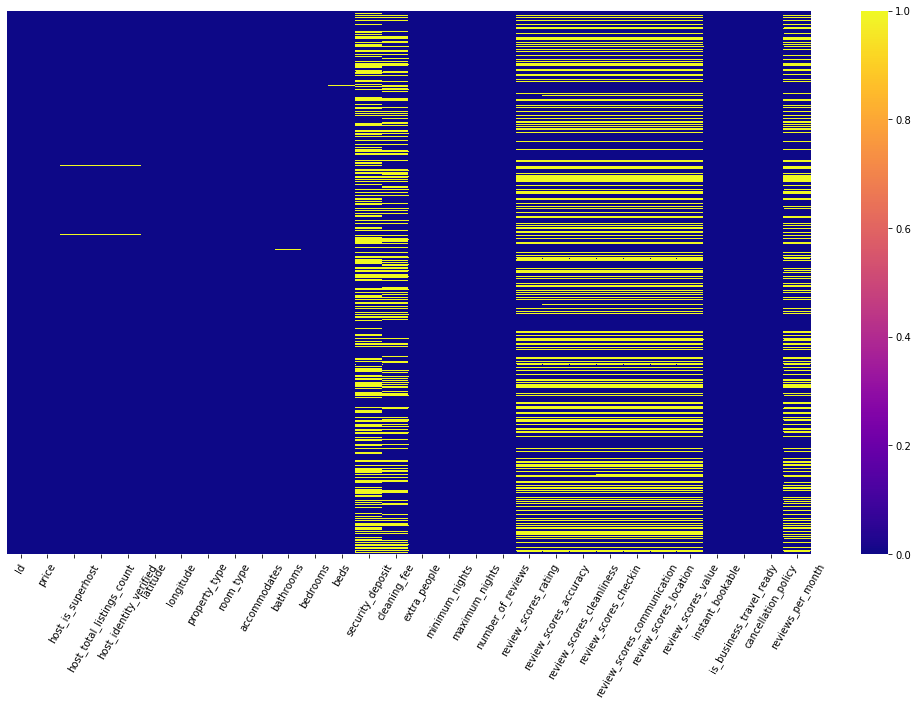

In [11]:
plt.figure(figsize=(18,10))   #graphical presentation of missing values in the dataset
sns.heatmap(air_df.isnull(),yticklabels=False, xticklabels=air_df.columns, cmap='plasma') 
plt.xticks(rotation=60)
plt.show()

In [12]:
air_df.isnull().sum()    # total no. of null values in each column

Id                               0
price                            0
host_is_superhost                2
host_total_listings_count        2
host_identity_verified           2
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
bathrooms                        3
bedrooms                         0
beds                             2
security_deposit               426
cleaning_fee                   307
extra_people                     0
minimum_nights                   0
maximum_nights                   0
number_of_reviews                0
review_scores_rating           340
review_scores_accuracy         342
review_scores_cleanliness      342
review_scores_checkin          344
review_scores_communication    343
review_scores_location         344
review_scores_value            344
instant_bookable                 0
is_business_travel_ready         0
cancellation_policy 

In [13]:
col_null=[]
percentage=[]
counts=[]
for col in air_df.columns:
    if air_df[col].isnull().sum()!=0:
        null=air_df[col].isnull().sum()
        percent=round((air_df[col].isnull().sum()/air_df[col].isnull().count())*100,2)
        percentage.append(percent)
        col_null.append(col)
        counts.append(null)

In [14]:
null_summary=pd.DataFrame({'columns': col_null, 'null_values': counts, 'percentage_null_values':percentage })
null_summary.sort_values(by='null_values', ascending=False)

,columns,null_values,percentage_null_values
5,security_deposit,426,42.6
10,review_scores_checkin,344,34.4
12,review_scores_location,344,34.4
13,review_scores_value,344,34.4
11,review_scores_communication,343,34.3
8,review_scores_accuracy,342,34.2
9,review_scores_cleanliness,342,34.2
7,review_scores_rating,340,34.0
14,reviews_per_month,311,31.1
6,cleaning_fee,307,30.7


from the above information we can see  that: 

security_deposit- has 42.6 % null values with 426 missing information 

review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value--has 34.4% missing values with 344,342 and 340 missing information in each column

reviews_per_month has 31.1% missing values with 311 missing information and cleaning_fee has 30.7% missing values with 307 missing information 

In [15]:
#imputing missing values for continuous variables
for num in air_df.select_dtypes(('float64', 'int64')):
    if air_df[num].isnull().sum()!=0:
        air_df[num]=air_df[num].fillna(air_df[num].median())

In [16]:
#imputing the missing value of a categorical variables
for col in air_df.select_dtypes('category'):
    air_df[col]=air_df[col].fillna(air_df[col].value_counts().index[0])

In [17]:
air_df=air_df.drop('Id', axis=1) # we do not need Id for the analysis

#### Outlier Analysis

In some cases, the values of the variables fall in the extreme range, which will impact the model fitting
 in an undesirable way. These values are called outliers that fall ouside the range of (Q1-1.5 * IQR) and (Q3+1.5 * IQR)

IQR- Inter-quartile range,
Q1- first quartile 
Q3-third quartile

sometimes  these values are random, but sometimes it is not random it adds certain information to the data. In this cases we cannot drop these outliers. We term them as business outliers.

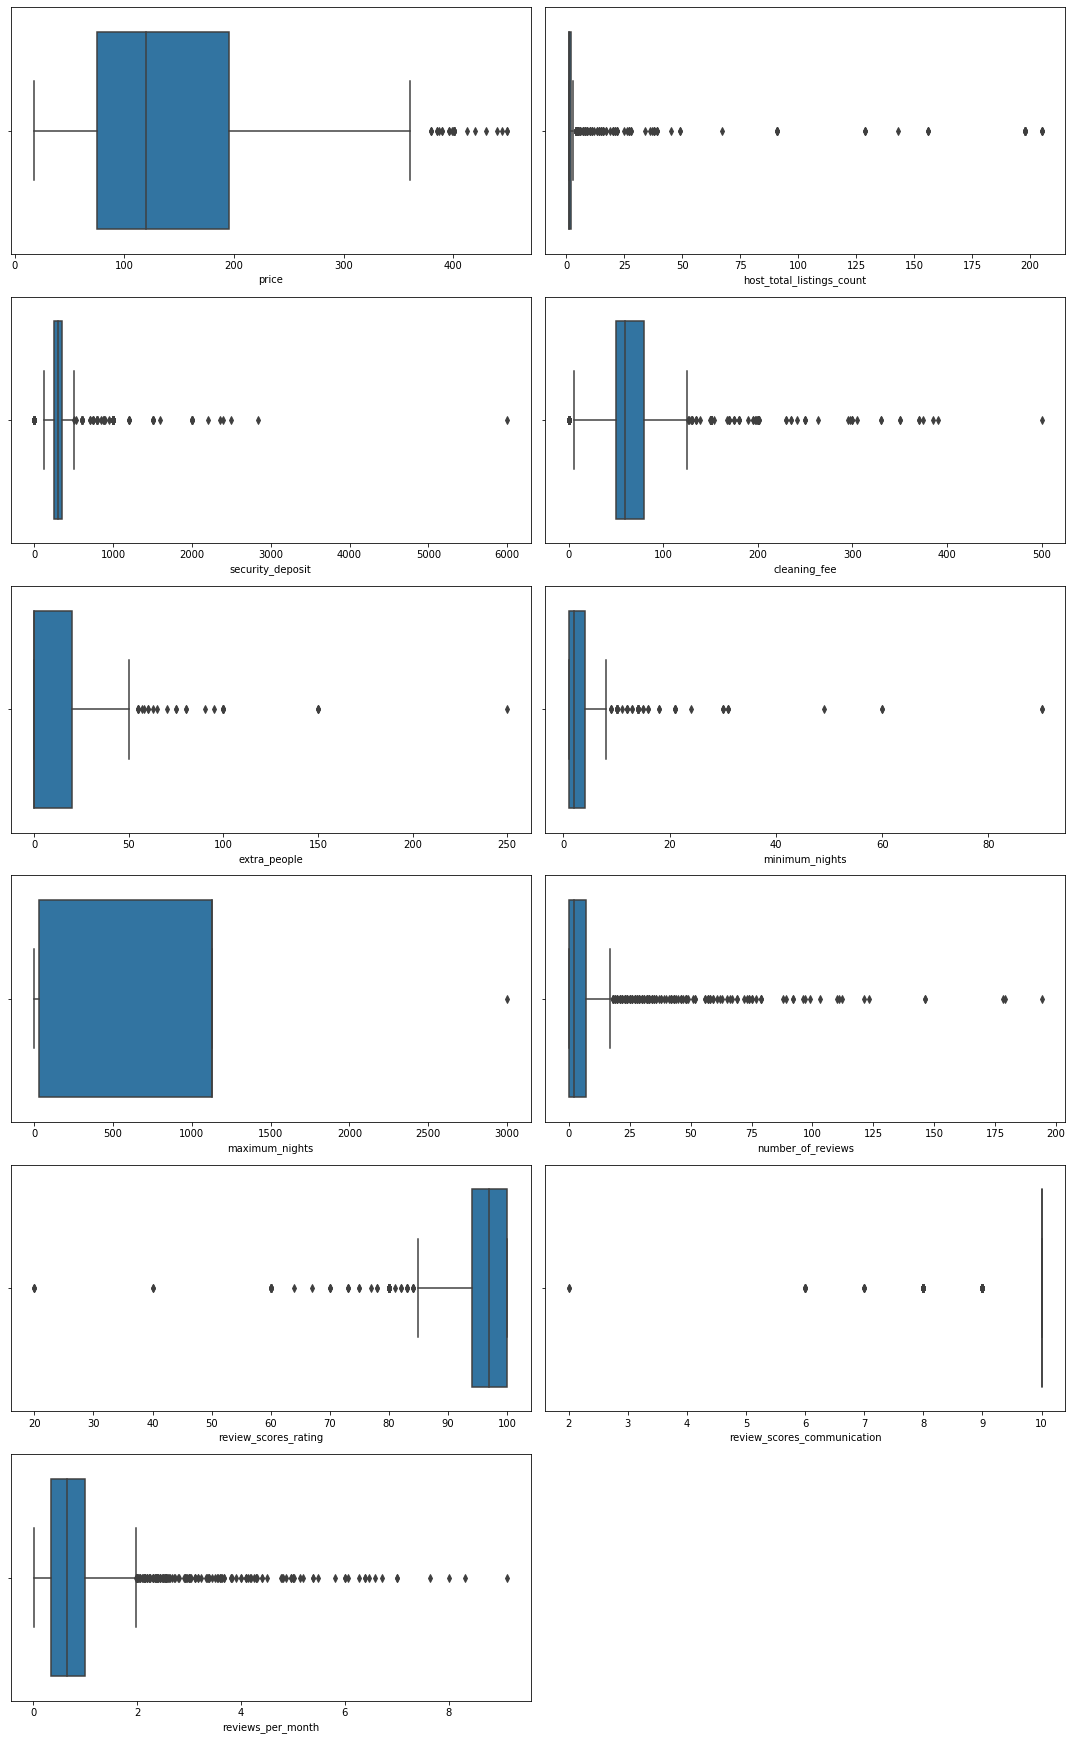

In [18]:
plt.figure(figsize=(15,60))
n=1
for column in air_df.select_dtypes(('int64', 'float64')):
    if (column!='longitude' and column!='latitude'):  
        plt.subplot(15,2,n)
        sns.boxplot(x=air_df[column])
        plt.tight_layout()
        n=n+1
plt.show()

host_total_listings: we see some hosts have listing more than 50. this can be business outliers,

accommodates: some host do have provisions to accommodate larger groups. similarly with bathrooms, bedrooms and beds variables

maximun_nights_stay: 3000 nights stay cannot be accounted practically. we can remove the outlier in maximum nights. 
minimum_nights: in general minimum night stay is mostly  between 1 - 2 , inorder to avoide unnecessary information loss we shall  drop the data above 40 minimum nights

security deposit- 6000 as security deposit is way too high, considering the nightly price. its better to have that observation drop as we do not noise interference in our model

cleaning fee, extra people charges and reviews seem to have outlier that can be potentially business outliers. 
We can always come back to outliers analysis, if we face any accuracy problem while fitting the models.

In [19]:
air_df[air_df['minimum_nights']>40]  # observations that have minimum nights above 40

,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
102,225,f,3.0,t,-33.774309,151.286700,House,Entire home/apt,7,2.0,4,3.0,1200.0,150.0,0,60,180,1,100.0,8.0,10.0,10.0,10.0,10.0,8.0,f,f,moderate,0.02
351,89,f,1.0,f,-33.882974,151.222259,Apartment,Entire home/apt,2,1.0,0,1.0,300.0,100.0,0,90,121,3,93.0,9.0,9.0,10.0,10.0,10.0,10.0,f,f,moderate,0.12
392,100,f,8.0,t,-33.697637,150.965894,House,Entire home/apt,6,2.5,3,3.0,300.0,60.0,0,49,49,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict,0.64
453,248,f,1.0,t,-33.897472,151.198359,House,Entire home/apt,4,1.0,2,2.0,300.0,60.0,0,90,180,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict,0.20
771,39,f,1.0,f,-33.795224,151.270880,Apartment,Private room,1,1.0,1,1.0,300.0,60.0,30,60,1125,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,flexible,0.64


We can see that there are only 5 observation for minimum_nights >40

In [20]:
air_df= air_df[air_df['minimum_nights']<40]

In [21]:
air_df[air_df['maximum_nights']>1500]

,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
780,100,f,1.0,t,-33.889988,151.193362,Apartment,Entire home/apt,2,1.0,0,1.0,150.0,50.0,0,12,3000,19,94.0,10.0,9.0,10.0,10.0,10.0,9.0,f,f,moderate,1.38


We see that there is only one observation for maximum nights>1500. this is definitely an outliers

In [22]:
air_df = air_df[air_df['maximum_nights']<1500]

In [23]:
air_df[air_df['security_deposit']>3000]

,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
304,350,f,2.0,t,-33.89893,151.173894,Townhouse,Entire home/apt,6,1.5,3,3.0,6000.0,50.0,150,2,1125,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,moderate,0.64


We notice that the price for the night stay is just 350, but with a security deposit of 6000 which is highly unlikely. so, its safe to drop the outlier

In [24]:
air_df=air_df[air_df['security_deposit']<3000]

In [25]:
air_df.shape

(993, 29)

## Exploratory Data Analysis

####  Univariate Analysis

let's bin the price variables for easy interpretation through visualization

In [26]:
bins=[0,75,100,150,250,500]
labels=['very low', 'low', 'moderate', 'High', 'veryhigh']
air_df['price_bins']=pd.cut(air_df['price'], bins=bins, labels=labels)
air_df['price_bins']=air_df['price_bins'].astype('category')

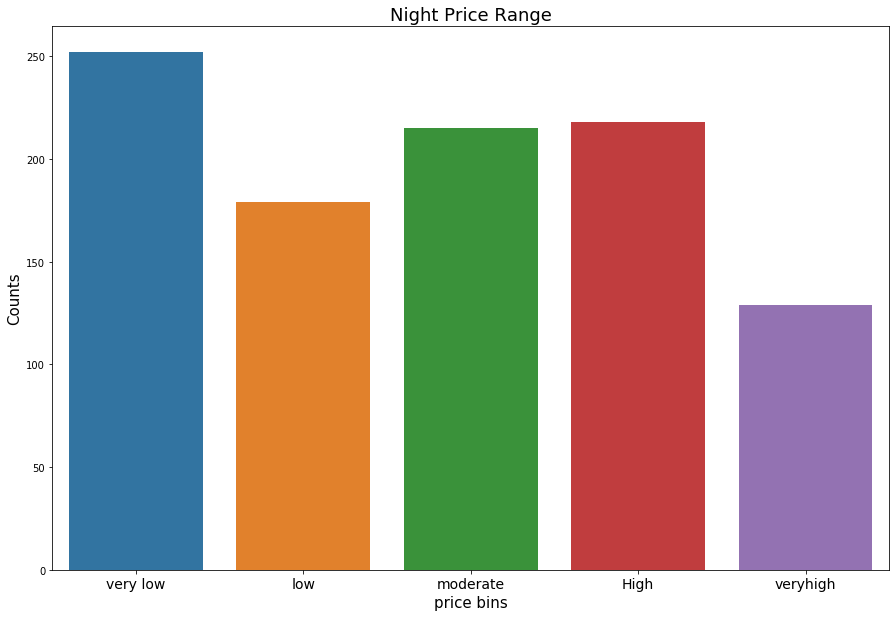

In [27]:
plt.figure(figsize=(15,10)) # fig height need to reduce it
sns.countplot(x='price_bins', data=air_df)
plt.xlabel('price bins', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Night Price Range', fontsize=18)
plt.xticks(fontsize=14)
plt.show()

from the above graph we can see that the nightly prices are right skewed, this means that the mean will be higher than the mode. Around 250 hosts charges night price <75, around 180 hosts charge between 75-100, and 220 host charge between 100-150. only 70 hosts charge between 300-500

#### Continuous variable

univariate analysis for price is already done above. univariate analysis of longitude and latitude is not required

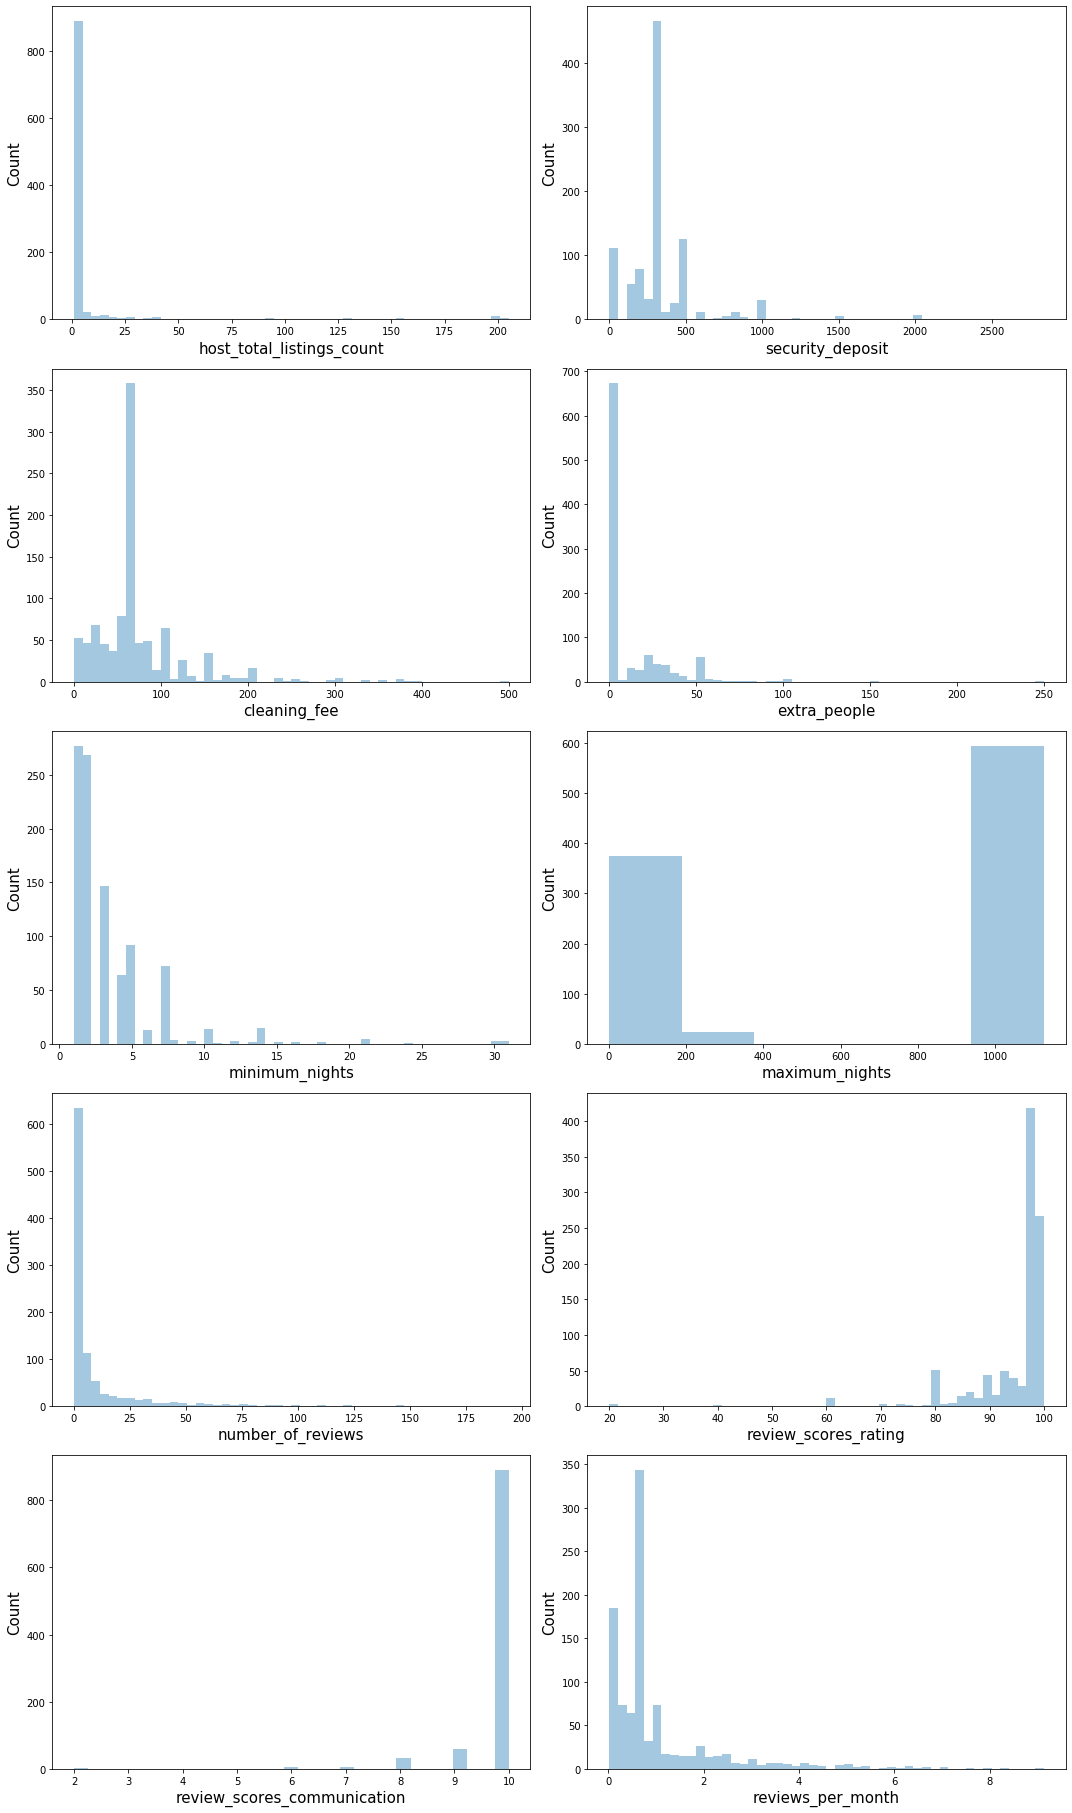

In [28]:
plt.figure(figsize=(15,60)) 
n=1
for col in air_df.select_dtypes(('float64', 'int64')):
    if (col!='price' and col!='longitude' and col!='latitude'):   
        plt.subplot(12,2,n)
        sns.distplot(air_df[col], kde=False)
        plt.ylabel('Count', fontsize=15)
        plt.xlabel(col, fontsize=15)
        plt.tight_layout()
        n=n+1
plt.show()

host_total_listings_count: We see maximum no. of hotels have listings less than 10. only a very few have listings more than 15.

security_deposit: we see a maximum no. of places charging security deposit between 0 to 1000. 

cleaning fee, extra people fees seems to have some business outliers. But we can always revisit it if we face any accuracy problem while modeling

step:7 categorical variables

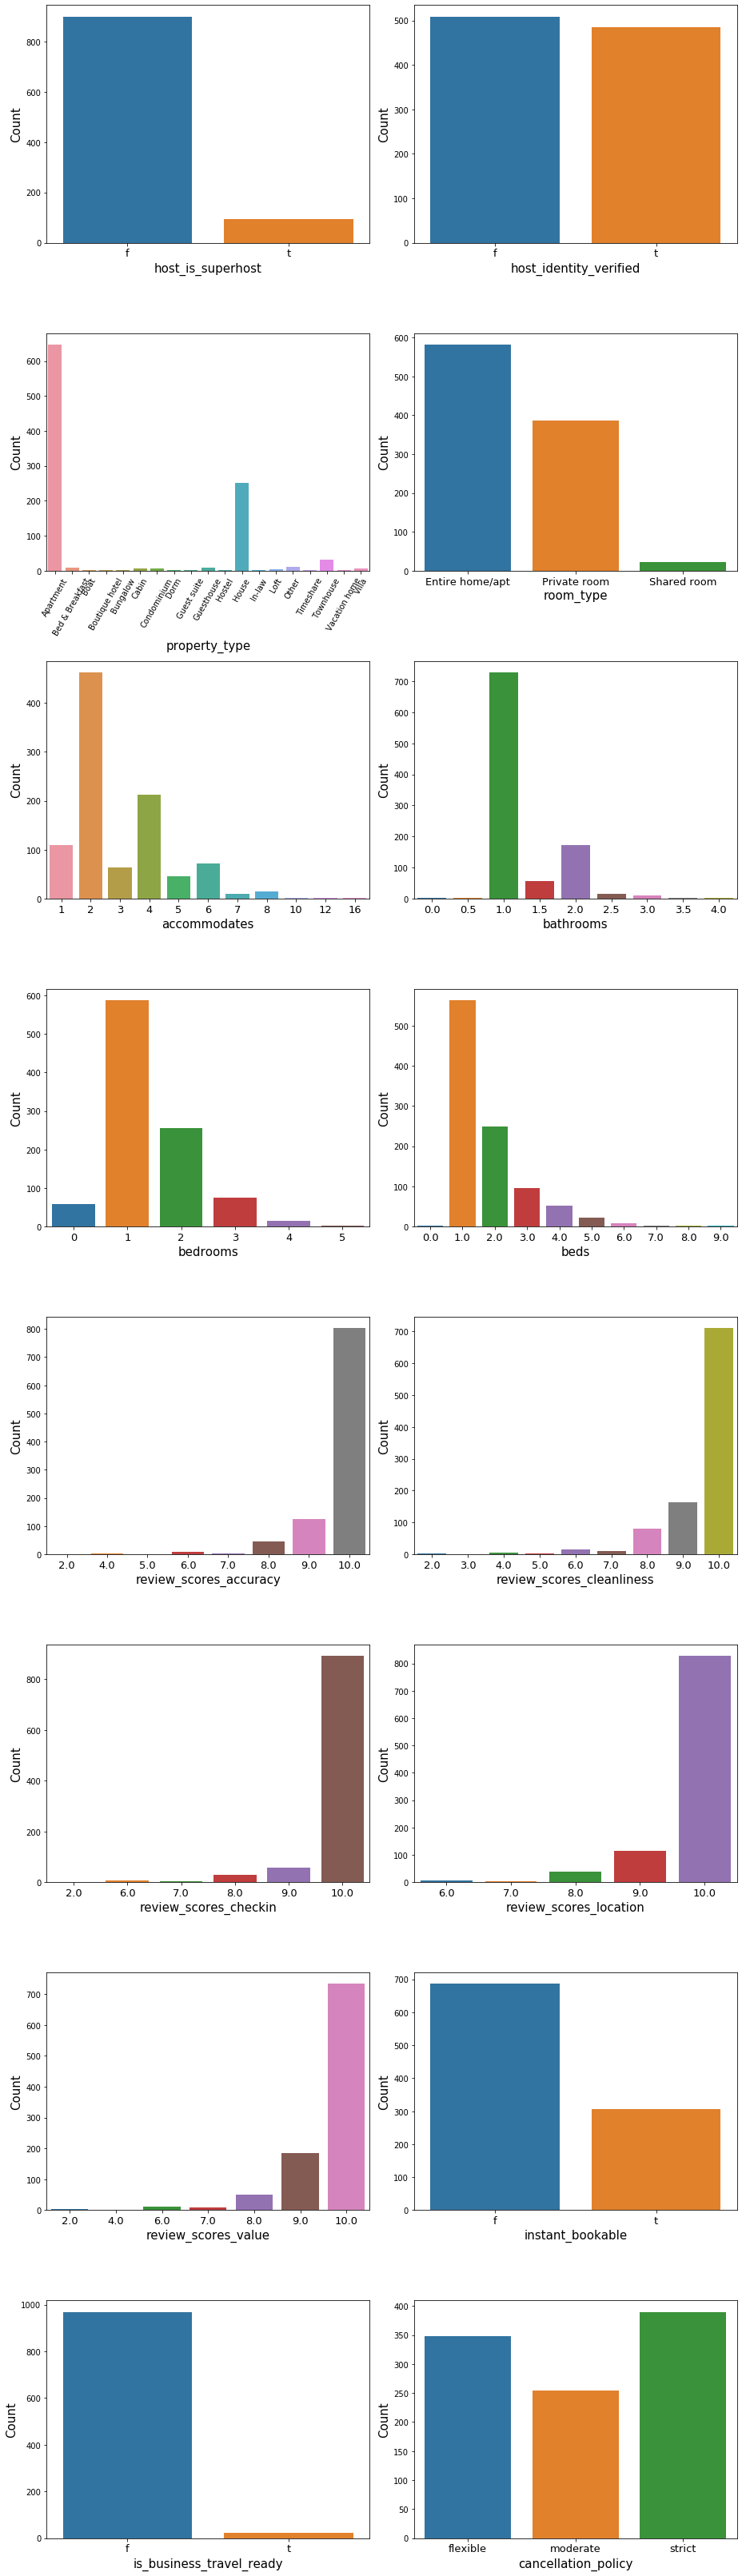

In [29]:
plt.figure(figsize=(13,50))
n=1
for col in air_df.select_dtypes('category'):
    if col!='price_bins':
        plt.subplot(9,2,n)
        sns.countplot(x=col, data=air_df)
        plt.ylabel('Count', fontsize=15)
        plt.xlabel(col,fontsize=15)
        plt.xticks(fontsize=13)
        plt.tight_layout()
        n=n+1
        if col=='property_type':                   # changing the orientation of xticks only for property_type variables 
            plt.xticks(rotation=60, fontsize=10)
plt.show()
# reduce the height

host_is_superhost: f- False, t-True, We can see that more than 90% of places are not a superhost.

host_identity_verified: f-False, t-True, around 500 places identity is not verified. i.e only 50% of places have their identity verified.

property_type: A large no. of places are apartments and houses. 'room_type' and 'property_type' are interrelated, we notice that a large no of apartment and houses are given on rent or leasing entirely, only in some properties we see the provision of private rooms and even less no. of shared room provisions. This can be because most of the visitor prefer to have and give some privacy. 

accommodates: approx 500 places can accommodate only 2 people and approx 230 places can accomodate 4 people. This means we have 
very limited options for group bookings. 
since a large no. of places can accommadate only 2 people, we also see they have amenities like 1 bathroom, 1 bedrooms and 1 or 2 beds to suppoort their guests.

0.5 bathroom -only consist of a sink and a toilet- it does not have any bathing facility

almost 500 hotels have 10 on 10 review scores for accuracy, location, cleaniness etc
Very less no. of places can be instantly booked, and even lesser no. of places are ready for business travelers. Most of the host have a strict cancellation policy while considerable no. of hosts are flexible with it.

#### Part :2 Bi-variate Analysis

Analysis of independent variables with respect to target

first lets check the correlation of continuous variable w.r.t price

graphical representation of the correlation between variables using heatmap

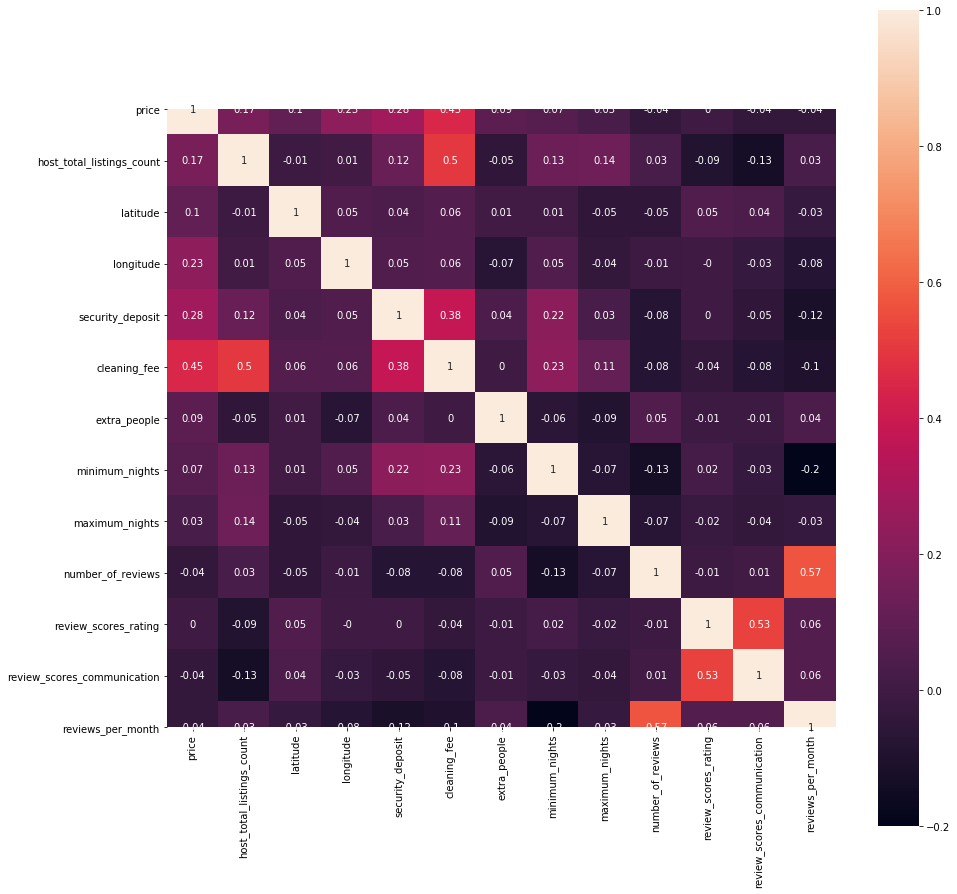

In [30]:
plt.figure(figsize=(15,15))
corr=round(air_df.corr(),2)
sns.heatmap(corr, square=True, annot=True)
plt.show()
#  USe Regression tutorial heatmap

variables like cleaning_fee, security_deposite and longitude shows good correlation with the price.
We also see a lot of correlation between host_total_listing_count and cleaning_fee,
and also no. of review and reviews per month are correlated

longitude: correlation with price signifies that price are also dependent on location.

In [31]:
num_col=[]
correlation=[]
for x in air_df.select_dtypes(('float64', 'int64')):
    if x!='price':
        corr=round(air_df['price'].corr(air_df[x]),2)
        correlation.append(corr)
        num_col.append(x)
    

In [32]:
corr_table=pd.DataFrame({'columns': num_col, 'correlation':correlation})
corr_table.sort_values(by='correlation', ascending=False)

,columns,correlation
4,cleaning_fee,0.45
3,security_deposit,0.28
2,longitude,0.23
0,host_total_listings_count,0.17
1,latitude,0.10
5,extra_people,0.09
6,minimum_nights,0.07
7,maximum_nights,0.03
9,review_scores_rating,0.00
8,number_of_reviews,-0.04


from the table we can see that variables hotel_total_listings_counts, extra_people too are slightly correlated with the target variable 

### Price range w.r.t accomodates

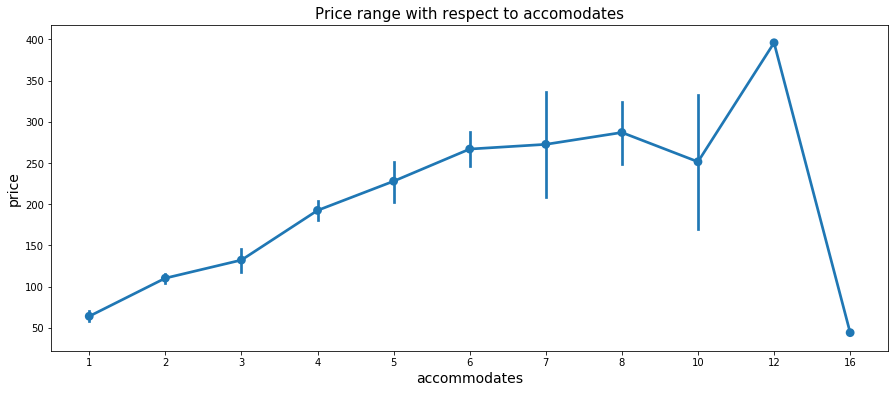

In [33]:
plt.figure(figsize=(15,6))
sns.pointplot(x='accommodates', y='price', data=air_df)
plt.title('Price range with respect to accomodates',fontsize=15)
plt.ylabel('price', fontsize=14)
plt.xlabel('accommodates', fontsize=14)
plt.show()

 We see a gradual increase in price as the no. of accommodates increases. but there is dip in price when the accomodates are 10 and 16. lets check why is there a price such a steep drop for 16 accommodates

In [34]:
sixteen_acc=air_df[air_df['accommodates']==16]
sixteen_acc.T

,429
price,44
host_is_superhost,f
host_total_listings_count,3
host_identity_verified,f
latitude,-33.8909
longitude,151.237
property_type,House
room_type,Shared room
accommodates,16
bathrooms,3


16 accommodates:  it’s a house with a single bedroom, 3 bathrooms and 8 beds which is supposed to be shared hence there is fall in the price for 16 accommodates.

We see that this observation is not adding much information to the  data, but tweaking the price is a very undesirable way. so it better we drop this particular observation

In [35]:
b_group=['bathrooms', 'bedrooms', 'beds']  # groupig the three variables for better visualization

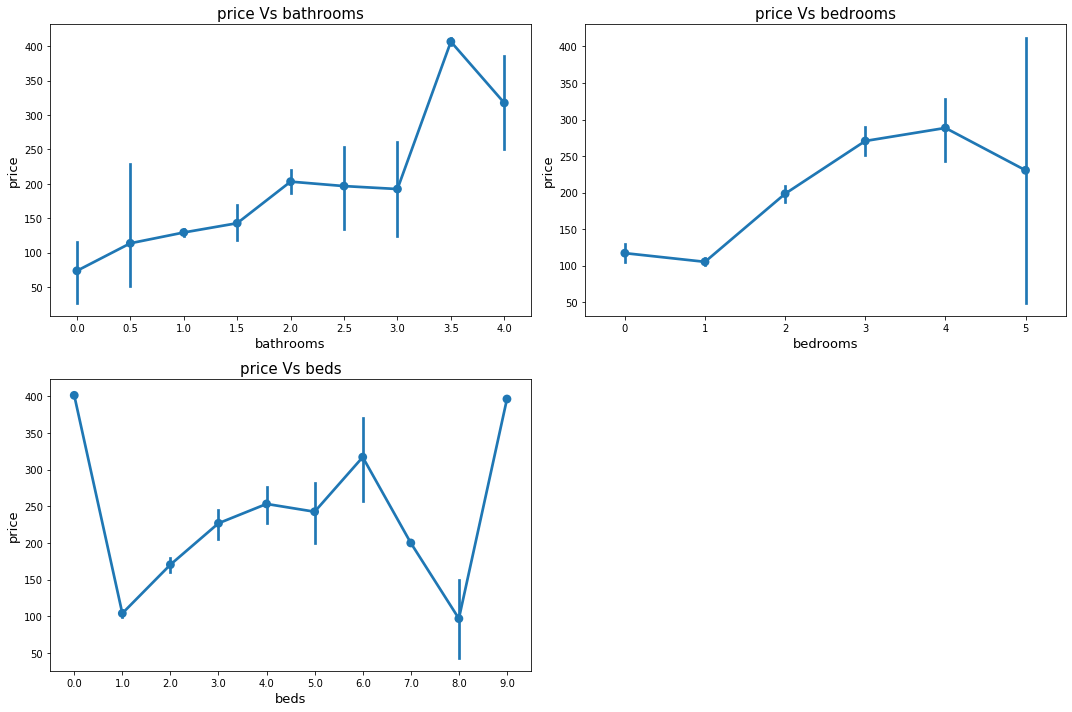

In [36]:
plt.figure(figsize=(15,10))
n=1
for var in b_group:
    plt.subplot(2,2,n)
    sns.pointplot(x=var, y='price', data=air_df)
    plt.ylabel('price', fontsize=13)
    plt.xlabel(var, fontsize=13)
    plt.title('price Vs ' + var, fontsize=15)
    plt.tight_layout()
    n=n+1
plt.show()

price increases with increase in the no. of bedrooms and bathrooms. 

beds: price of bed increase gradually when from 1 bed to 6 beds, 7 and 8 beds price slows down. where as the price of 0 bed and 9 beds are quite high

In [37]:
payments=['cleaning_fee', 'security_deposit']  #grouping two variables for better visualization and comparison

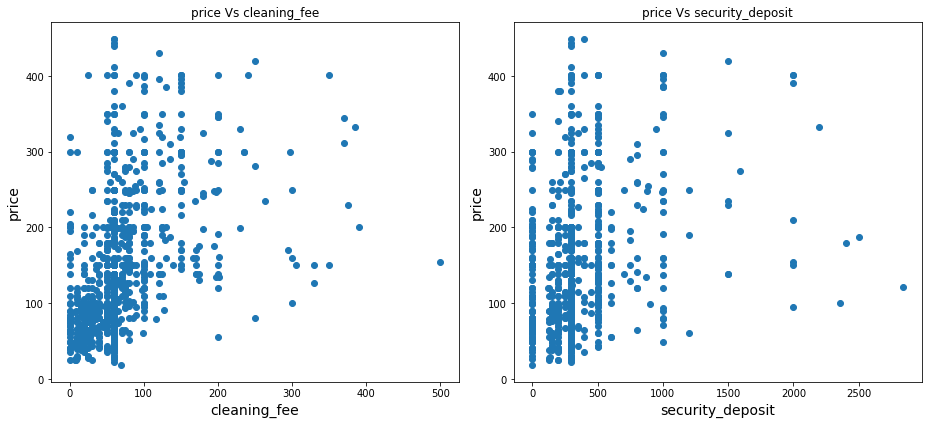

In [38]:
plt.figure(figsize=(13,6))
n=1
for pay in payments:
    plt.subplot(1,2,n)
    plt.scatter(air_df[pay], air_df['price'])
    plt.xlabel(pay, fontsize=14)
    plt.ylabel('price', fontsize=14)
    n=n+1
    plt.title('price Vs ' + pay)
    plt.tight_layout()
plt.show()

Cleaning Fee:  we notice that the most of hotel cleaning fee below 100 has night charges below 200.
security deposit: We can see an outlier here with 6000 as security fee. we will remove this outlier feature engineering section.

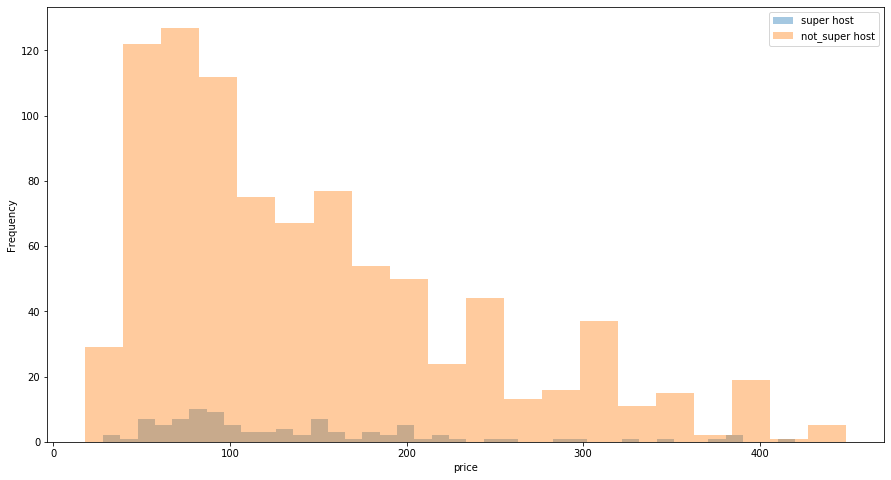

In [39]:
plt.figure(figsize=(15,8))
super_host=air_df[air_df['host_is_superhost']=='t']
no_super_host=air_df[air_df['host_is_superhost']=='f']
plt.subplot(1,1,1)
sns.distplot(super_host['price'], kde=False, bins=40, label='super host')
sns.distplot(no_super_host['price'], kde=False, bins=20, label='not_super host') 
plt.ylabel('Frequency')
plt.legend()
plt.show()


we see that both super_host and not_super_host have same price distribution. i.e. the price for both super_host and not a super host are right skewed  

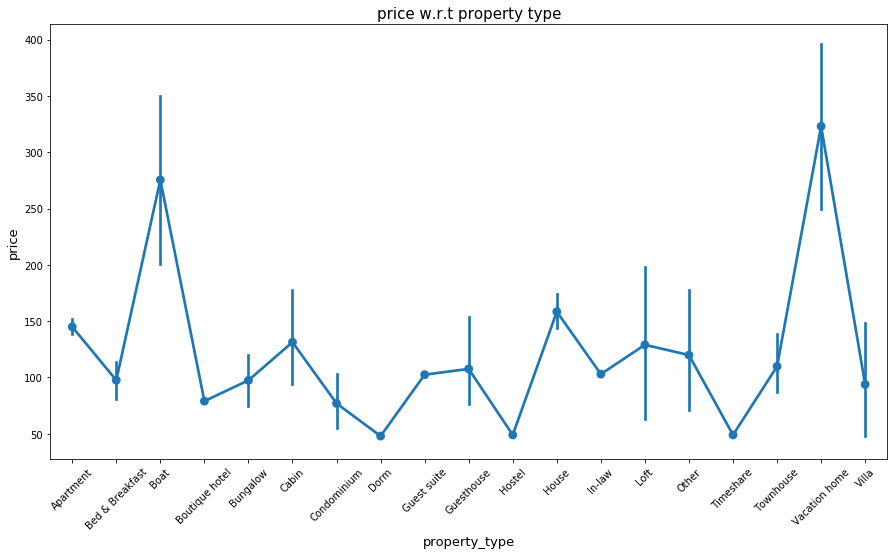

In [40]:
plt.figure(figsize=(15,8))
chart=sns.pointplot(x='property_type', y='price', data=air_df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.xlabel('property_type', fontsize=13)
plt.ylabel('price', fontsize=13)
plt.title('price w.r.t property type', fontsize=15)
plt.show()

We can see the properties like boat and vacation homes have expensive stays, where as hostel and timeshare have very economical stays

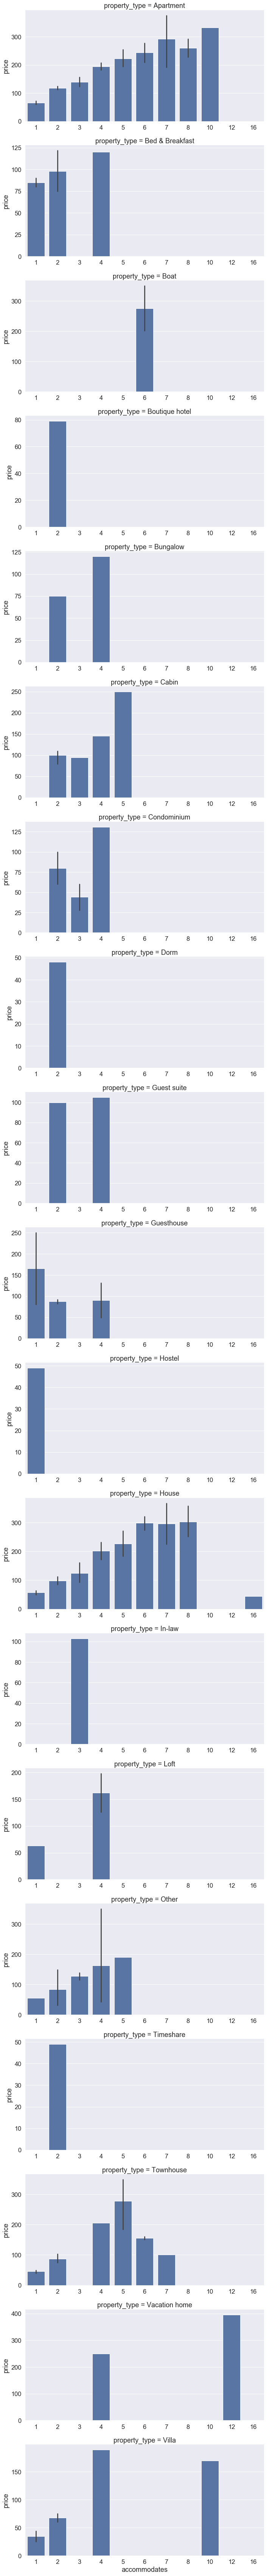

In [41]:
sns.set(font_scale=1.5)
FacetGrid=sns.FacetGrid(air_df,row='property_type', height=5, aspect=2, sharex=False, sharey=False)
FacetGrid.map(sns.barplot,'accommodates', 'price', order=None, hue_order=None)
sns.set(font_scale=2)
FacetGrid.add_legend()
plt.show()


We notice that properties like:

Boat and vacation home- price range is very high with fewer accomodation

villa, town house, house, cabin and appratment has accommodation ranging from 1to 10 at a price range 50 to 200.


In [42]:
def bi_variate(data, col1, col2):
        cross_tab=pd.crosstab(air_df[col1], air_df[col2])
        sns.set(font_scale=1)
        cross_tab.plot.bar(stacked=False, figsize=(12,8))
        plt.xlabel('{}'.format(col1), fontsize=14)
        plt.ylabel('{}'.format(col2), fontsize=14)
        plt.title('{} Vs price'.format(col1), fontsize=14)
        plt.xticks(rotation=45)
        plt.show()
        return cross_tab

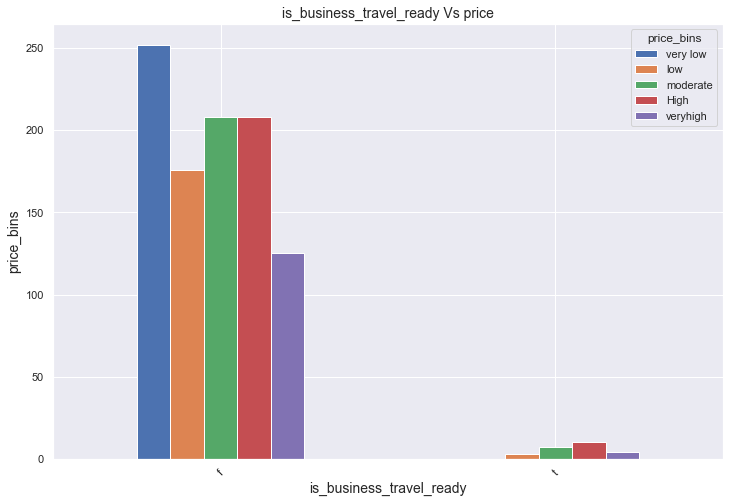

price_bins,very low,low,moderate,High,veryhigh
is_business_travel_ready,,,,,
f,252,176,208,208,125
t,0,3,7,10,4


In [43]:
bi_variate(air_df, 'is_business_travel_ready', 'price_bins')

from the above graph we can infer that the price for business purpose stay falls between moderate to high range. We can also say that there are hardly any places ready for business purpose stay.

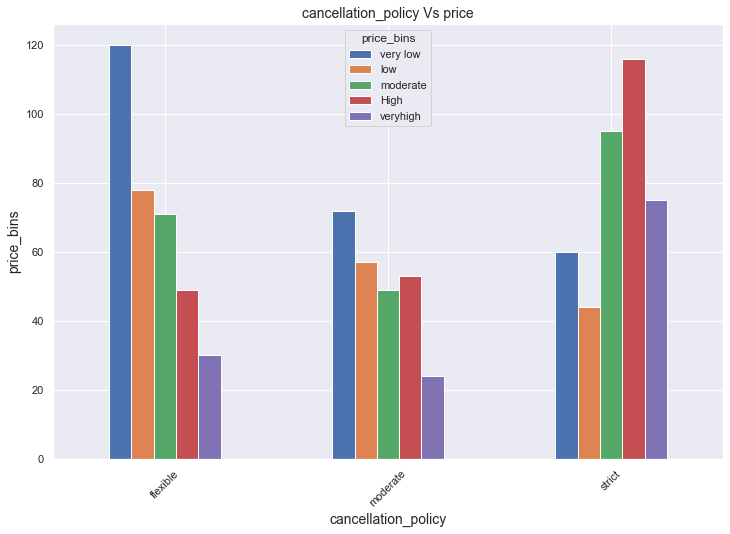

price_bins,very low,low,moderate,High,veryhigh
cancellation_policy,,,,,
flexible,120,78,71,49,30
moderate,72,57,49,53,24
strict,60,44,95,116,75


In [44]:
bi_variate(air_df, 'cancellation_policy', 'price_bins')

from the above plot we learn that the price range increase as the cancellation policy moves form flexible to strict, most of the places follow a strict cancellation policy

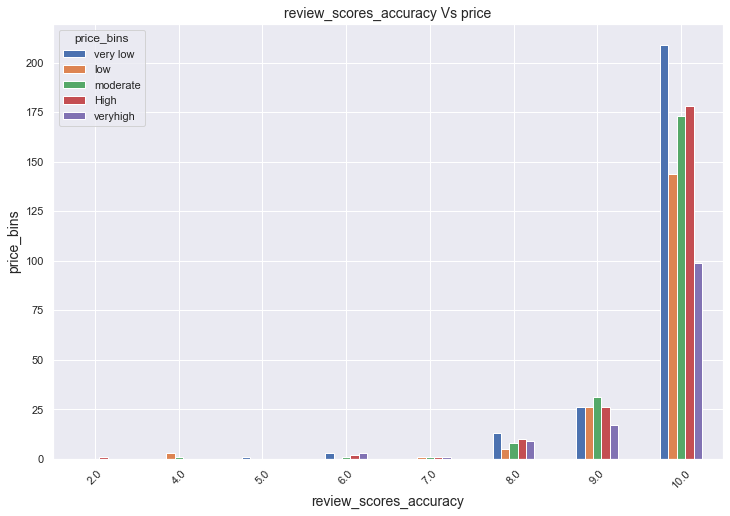

price_bins,very low,low,moderate,High,veryhigh
review_scores_accuracy,,,,,
2.0,0,0,0,1,0
4.0,0,3,1,0,0
5.0,1,0,0,0,0
6.0,3,0,1,2,3
7.0,0,1,1,1,1
8.0,13,5,8,10,9
9.0,26,26,31,26,17
10.0,209,144,173,178,99


In [45]:
bi_variate(air_df, 'review_scores_accuracy', 'price_bins')

We can notice that most of the places have received 10/10 accuracy scores.

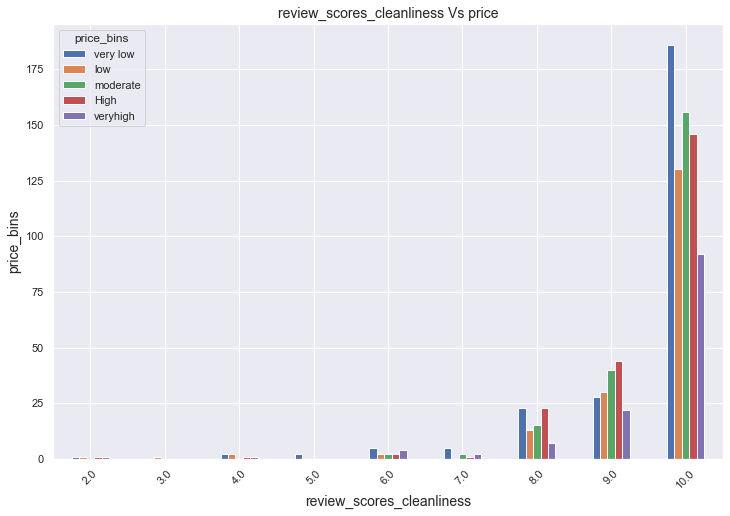

price_bins,very low,low,moderate,High,veryhigh
review_scores_cleanliness,,,,,
2.0,1,1,0,1,1
3.0,0,1,0,0,0
4.0,2,2,0,1,1
5.0,2,0,0,0,0
6.0,5,2,2,2,4
7.0,5,0,2,1,2
8.0,23,13,15,23,7
9.0,28,30,40,44,22
10.0,186,130,156,146,92


In [46]:
bi_variate(air_df, 'review_scores_cleanliness', 'price_bins')

We can infer that the price range  for lesser cleanliness score fall in the very low category. But at the same time places with high clean score have price range from low to very high

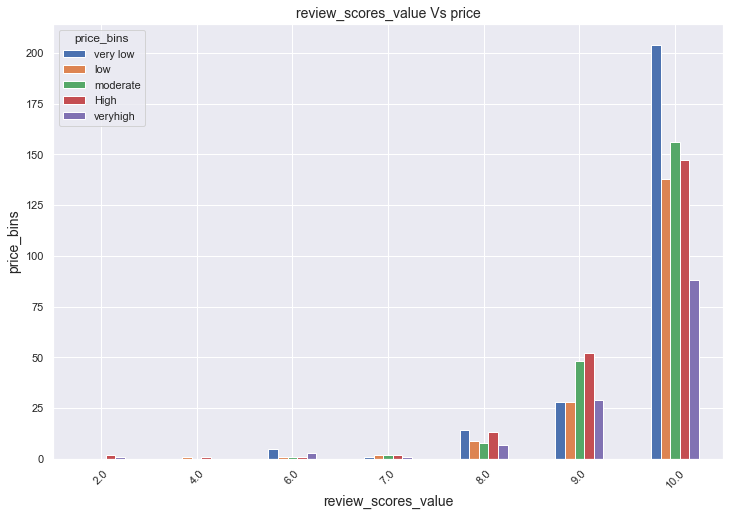

price_bins,very low,low,moderate,High,veryhigh
review_scores_value,,,,,
2.0,0,0,0,2,1
4.0,0,1,0,1,0
6.0,5,1,1,1,3
7.0,1,2,2,2,1
8.0,14,9,8,13,7
9.0,28,28,48,52,29
10.0,204,138,156,147,88


In [47]:
bi_variate(air_df, 'review_scores_value', 'price_bins')

We clearly see that the nightly charges are not dependent on review_score_values.

In [48]:
from gmplot import gmplot # importing gmplot for plotting geolocation

In [49]:
center_lat=air_df['latitude'].mean()
center_long=air_df['longitude'].mean()
zoom=10

In [50]:
gmap=gmplot.GoogleMapPlotter(center_lat, center_long, zoom)
gmap.scatter(air_df['latitude'], air_df['longitude'], '#3B0B39', size=40, marker=False)
gmap.scatter(air_df['latitude'], air_df['longitude'], c='price_bins', marker=True)
gmap.heatmap(air_df['latitude'], air_df['longitude'])
gmap.draw("D:\\Datascience\\air_bnb.html")

From the plot we can infer that the price also depends on location of the hosts. hosts located at city center charges higher than hosts on the outskirts

### Feature -Engineering

dropping price bins: price bins variables were created for better visualization. since we are already having the price variable. its better we drop the price_bins that we createds 

In [51]:
air_df=air_df.drop('price_bins', axis=1)  # price were binned for better visualization, we do not need them for modelling

categorical- level check

first lets sort categorical variable property_type 

In [52]:
air_df['property_type'].value_counts() # checking the no. of levels in the property_type variable 

Apartment          648
House              251
Townhouse           31
Other               11
Bed & Breakfast      9
Guesthouse           8
Condominium          7
Cabin                6
Villa                6
Loft                 3
Vacation home        2
Guest suite          2
Bungalow             2
Boat                 2
In-law               1
Hostel               1
Dorm                 1
Boutique hotel       1
Timeshare            1
Name: property_type, dtype: int64

In [53]:
n=air_df['property_type'].value_counts().index[:2]        #We'll reduce the no. of labels in the variable
air_df['property_type']=air_df.property_type.where(air_df.property_type.isin(n),'other')
air_df['property_type'].value_counts()

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Implicitly converting categorical to object-dtype ndarray. One or more of the values in 'other' are not present in this categorical's categories. A future version of pandas will raise a ValueError when 'other' contains different categories.

To preserve the current behavior, add the new categories to the categorical before calling 'where', or convert the categorical to a different dtype.
  


Apartment    648
House        251
other         94
Name: property_type, dtype: int64

In [54]:
air_df['property_type']=air_df['property_type'].astype('category')

now, we will deal with the outlier of the security deposit

step 10: Scaling Numeric Feautres

In [55]:
from sklearn.preprocessing import MinMaxScaler     # importing library for scaling numerical columns

In [56]:
air_df=air_df.drop(['latitude', 'longitude'], axis=1) #lets drop longitude and latitude from the data set

In [57]:
numeric_col=[]            # lets append numerical columns into numeric_col
for col in air_df.select_dtypes(('float64', 'int64')): 
    numeric_col.append(col)

In [58]:
numeric_col

['price',
 'host_total_listings_count',
 'security_deposit',
 'cleaning_fee',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_communication',
 'reviews_per_month']

In [59]:
numeric=air_df.loc[:,numeric_col]               # scaling the numeric variables
nums=np.round(MinMaxScaler().fit_transform(numeric),2)
numeric=pd.DataFrame(nums,columns=numeric_col)
numeric.shape

(993, 11)

step:11 encoding for categorical variables

In [60]:
from sklearn.preprocessing import LabelEncoder #importing Label Encoder library
le=LabelEncoder()

In [61]:
cat_col=[]
for col in air_df.select_dtypes('category'):     #grouping the categorical column
    cat_col.append(col)

In [62]:
cat=air_df.loc[:,cat_col]

In [63]:
for col in cat.columns:
    cat[col]=le.fit_transform(cat[col].astype('str'))   #label encoding the different levels of a categorical variables

In [64]:
cat.shape

(993, 16)

In [65]:
Air_Df=pd.concat([numeric,cat], axis=1)    #concating the numerica and categorical variables into Air_Df

In [66]:
Air_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
price                          993 non-null float64
host_total_listings_count      993 non-null float64
security_deposit               993 non-null float64
cleaning_fee                   993 non-null float64
extra_people                   993 non-null float64
minimum_nights                 993 non-null float64
maximum_nights                 993 non-null float64
number_of_reviews              993 non-null float64
review_scores_rating           993 non-null float64
review_scores_communication    993 non-null float64
reviews_per_month              993 non-null float64
host_is_superhost              993 non-null float64
host_identity_verified         993 non-null float64
property_type                  993 non-null float64
room_type                      993 non-null float64
accommodates                   993 non-null float64
bathrooms                      993 non-null float64
bedrooms  

We notice that the outlier that we removed have reappeared as 'NAN' in the concated dataset so we shall drop those 'NAN' values along zero axis

In [67]:
Air_Df=Air_Df.dropna(axis=0)  

### Modelling 

Model1:Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

now lets split the data set into train and test

In [69]:
x=Air_Df.drop('price',axis=1)
y=Air_Df['price']                        #splitting the x-feature and y-target

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=1) # splitting the dataset into train and test sets

In [71]:
print('Size of x_train is:', x_train.shape)
print('Size of x_test is:', x_test.shape)
print('Size of y_train is:', y_train.shape)
print('Size of y_test is:', y_test.shape)

Size of x_train is: (788, 26)
Size of x_test is: (198, 26)
Size of y_train is: (788,)
Size of y_test is: (198,)


In [72]:
linreg=LinearRegression()
model1=linreg.fit(x_train,y_train)     #fitting Linear Regression to x_train, y_train

In [73]:
y_pred=model1.predict(x_test)     #Predicting

In [74]:
result=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
result.head()

,Actual,Predicted
961,0.45,0.262257
237,0.40,0.254566
489,0.54,0.268622
806,0.36,0.520513
728,0.09,0.244722


In [75]:
linreg_coef=np.round(linreg.coef_,3)   #coefficient of variable for Linear Regression model

In [103]:
result=pd.DataFrame({'Columns':x_train.columns, 'Linear_coef':linreg_coef})
result

,Columns,Linear_coef
0,host_total_listings_count,-0.066
1,security_deposit,0.246
2,cleaning_fee,0.788
3,extra_people,0.173
4,minimum_nights,-0.066
5,maximum_nights,0.002
6,number_of_reviews,0.005
7,review_scores_rating,0.096
8,review_scores_communication,-0.087
9,reviews_per_month,0.003


In [77]:
from sklearn import metrics #importing metrics

In [78]:
MSE=metrics.mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
print('Root mean squared error:',RMSE)
# scatter plot

Root mean squared error: 0.19219308238164354


In [79]:
r_sq=metrics.r2_score(y_test,y_pred)
print('R_squared error:',r_sq)

R_squared error: 0.1912330694442308


the root mean squared and the R_squared do not fall the in the desirable range. this means the model is not doing a good job here.

##### Hyper parameter tuning

In [124]:
def batch_gradient_descent(X, Y, lrate, niter):
    weights=np.zeros(X.shape[1])
    history=[]
    m=len(Y)
    derivative=lambda loss: (X.T.dot(loss))/m
    for i in range(niter):
        gradient_predict=linreg.predict(X)
        loss=gradient_predict-Y
        weights=weights-lrate*derivative(loss)
        if i%50==0: 
            history.append(metrics.mean_squared_error(x.dot(weights), y))
            
    return gradient_predict, history
    
    

In [127]:
lrates = [.5, .1, .01, .001, .0001]
niterations = [25000, 50000, 150000]

In [129]:
record=[]
for niter in niterations:
    for lrate in lrates:
        weights, history = batch_gradient_descent(x_train,y_train, lrate, niter)
        record.append(dict(lrate=lrate, niter=niter, w=weights, history=history))

TypeError: string indices must be integers

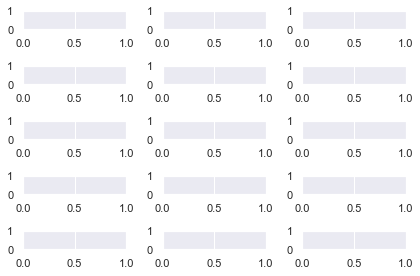

In [156]:
fig, ax= plt.subplots(5,3)
fig.tight_layout()
ax=ax.flatten()
for i, record in enumerate (record):
    label = 'lr: {0}, ni: {1}'.format(record["lrate"], record["niter"])
    ax[i].plot(record['history'], label=label)
    ax[i].legend(loc='upper right')

##### Model2: random Forest

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
rand=RandomForestRegressor(n_estimators=100, min_samples_leaf=5, max_depth=20)

In [82]:
rand.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [83]:
pred_rand=rand.predict(x_test)

In [102]:
rand_pred_table=pd.DataFrame({'Actual':y_test, 'Predicted':pred_rand})
rand_pred_table.head()

,Actual,Predicted
961,0.45,0.228770
237,0.40,0.281093
489,0.54,0.196520
806,0.36,0.571404
728,0.09,0.161665


In [85]:
RMSE=np.sqrt(metrics.mean_squared_error(y_test,pred_rand))
print('RMSE:', np.round(RMSE,2))

RMSE: 0.2


root mean squared error is 0.18, this means on an averange our prediction is 0.18 $ away from the actual price

In [86]:
score=rand.score(x_train,y_train)
print('random forest score:', np.round(score,2))
print('percentage:',np.round(score*100,2),'%')

random forest score: 0.62
percentage: 62.35 %


The Random Forest model is doing a good job over 0.62 is a good score. its giving us 62.35% accuracy

In [87]:
importance=rand.feature_importances_

In [88]:
feature_imp=pd.DataFrame({'columns':x_test.columns,'importances':np.round(importance,2)})
feature_imp.sort_values(by='importances', ascending=False)

,columns,importances
2,cleaning_fee,0.50
1,security_deposit,0.07
9,reviews_per_month,0.05
4,minimum_nights,0.05
3,extra_people,0.03
5,maximum_nights,0.03
6,number_of_reviews,0.03
7,review_scores_rating,0.03
14,accommodates,0.03
11,host_identity_verified,0.02


From the above table it is evident that cleaning fee are the most significant variables 

##### Model:3- Linear Regression using stats model

In [89]:
import statsmodels.api as sm

In [90]:
sm_x_train=sm.add_constant(x_train)
lin_reg=sm.OLS(y_train, sm_x_train).fit()

C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [91]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     9.256
Date:                Tue, 31 Dec 2019   Prob (F-statistic):           3.79e-31
Time:                        11:34:58   Log-Likelihood:                 216.69
No. Observations:                 788   AIC:                            -379.4
Df Residuals:                     761   BIC:                            -253.3
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.1025      0.087      1.174      0.241      -0.069       0.274
host_total_listings_count      -0.0659      0.062     -1.066      0.287      -0.187       0.055
security_deposit                0.2464      0.066      3.717      0.000       0.116       0.377
cleaning_fee                    0.7883      0.072     10.948      0.000       0.647       0.930
extra_people                    0.1728      0.082      2.103      0.036       0.011       0.334
minimum_nights                 -0.0661      0.058     -1.138      0.256      -0.180       0.048
maximum_nights                  0.0019      0.015      0.130      0.897      -0.027       0.030
number_of_reviews               0.0053      0.074      0.072      0.942      -0.139       0.150
review_scores_rating            0.0964      0.080      1.211      0.226      -0.060       0.253
review_scores_communication    -0.0867      0.097     -0.893      0.372      -0.277       0.104
reviews_per_month               0.0028      0.058      0.049      0.961      -0.112       0.117
host_is_superhost              -0.0133      0.023     -0.568      0.570      -0.059       0.033
host_identity_verified         -0.0097      0.014     -0.680      0.496      -0.038       0.018
property_type                  -0.0043      0.011     -0.404      0.686      -0.025       0.017
room_type                       0.0194      0.016      1.184      0.237      -0.013       0.052
accommodates                    0.0003      0.005      0.062      0.950      -0.009       0.010
bathrooms                       0.0009      0.008      0.114      0.909      -0.015       0.017
bedrooms                        0.0083      0.013      0.654      0.513      -0.017       0.033
beds                            0.0112      0.009      1.210      0.227      -0.007       0.029
review_scores_accuracy         -0.0001      0.003     -0.030      0.976      -0.007       0.006
review_scores_cleanliness       0.0024      0.002      0.955      0.340      -0.003       0.007
review_scores_checkin           0.0017      0.006      0.301      0.763      -0.009       0.013
review_scores_location         -0.0054      0.005     -1.011      0.312      -0.016       0.005
review_scores_value             0.0018      0.004      0.507      0.613      -0.005       0.009
instant_bookable               -0.0001      0.015     -0.010      0.992      -0.030       0.029
is_business_travel_ready        0.0275      0.043      0.634      0.526      -0.058       0.113
cancellation_policy            -0.0002      0.009     -0.024      0.981      -0.017       0.017
==============================================================================
Omnibus:                      119.065   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarqu

According to the stats model linear regression we infer that Security_deposit, cleaning _fee, extra_people are all significant variables 

##### model:4 Ridge regression

In [92]:
from sklearn.linear_model import Ridge    # importing Ridge Regression

In [93]:
ridge_reg=Ridge(alpha=0.5, random_state=0)
ridge_reg.fit(x_train,y_train)
ridge_pred=ridge_reg.predict(x_test)

In [94]:
ridge_MSE=np.mean((ridge_pred-y_test)**2)
print ('mean squared error is:', round(ridge_MSE,2))

mean squared error is: 0.04


In [95]:
ridge_Accuracy=ridge_reg.score(x_test,y_test)
print('Accuracy of lasso regression is:', ridge_Accuracy*100,'%')

Accuracy of lasso regression is: 18.78156118865162


In [98]:
ridge_coef=np.round(ridge_reg.coef_,3)
ridge_coef

array([-0.044,  0.248,  0.738,  0.16 , -0.057,  0.002,  0.003,  0.086,
       -0.074,  0.001, -0.013, -0.01 , -0.004,  0.019,  0.   ,  0.001,
        0.008,  0.011, -0.   ,  0.002,  0.002, -0.006,  0.002, -0.   ,
        0.026,  0.   ])

In [104]:
result['Ridge_coef']=ridge_coef
result

,Columns,Linear_coef,Ridge_coef
0,host_total_listings_count,-0.066,-0.044
1,security_deposit,0.246,0.248
2,cleaning_fee,0.788,0.738
3,extra_people,0.173,0.160
4,minimum_nights,-0.066,-0.057
5,maximum_nights,0.002,0.002
6,number_of_reviews,0.005,0.003
7,review_scores_rating,0.096,0.086
8,review_scores_communication,-0.087,-0.074
9,reviews_per_month,0.003,0.001


##### model 5: Lasson Regression

In [105]:
from sklearn.linear_model import Lasso

In [106]:
las_reg=Lasso(alpha=0.01, random_state=0)
las_reg.fit(x_train,y_train)
las_pred=las_reg.predict(x_test)

In [107]:
las_MSE=np.mean((las_pred-y_test)**2)
print ('mean squared error is:', round(las_MSE,2))

mean squared error is: 0.04


In [109]:
las_Accuracy=las_reg.score(x_test,y_test)
print('Accuracy of lasso regression is:', las_Accuracy*100, '%')

Accuracy of lasso regression is: 1.8769453512463286 %


In [111]:
lasso_coef=np.round(las_reg.coef_,3)
result['lasso_Coef']=lasso_coef
result

,Columns,Linear_coef,Ridge_coef,lasso_Coef
0,host_total_listings_count,-0.066,-0.044,0.000
1,security_deposit,0.246,0.248,0.000
2,cleaning_fee,0.788,0.738,0.071
3,extra_people,0.173,0.160,0.000
4,minimum_nights,-0.066,-0.057,0.000
5,maximum_nights,0.002,0.002,0.000
6,number_of_reviews,0.005,0.003,-0.000
7,review_scores_rating,0.096,0.086,0.000
8,review_scores_communication,-0.087,-0.074,-0.000
9,reviews_per_month,0.003,0.001,-0.000


#### Conclusiuon:

We notice that Random forest model shows a better accuracy rate, lets tune the hyper parameter and see the optimum parameter measure for good accuracy.

In [157]:
from sklearn.model_selection import GridSearchCV

In [158]:
rfc=RandomForestRegressor(oob_score=True)
param_grid = {
    'n_estimators': [100, 150, 200, 200, 250, 300],
    'max_depth': [5,10,15,20],
    'min_samples_leaf': [9,7,5]
}

In [159]:
rf_cv=GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
rf_cv.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=True, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [5, 10, 15, 20],
  

In [160]:
rf_cv.best_score_

0.32063347298657136

In [161]:
rf_cv.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=9, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=None, oob_score=True, random_state=None, verbose=0,
                      warm_start=False)